# Master's Thesis: Investigating Maximum Rainfall Trends in Colorado

<b>Institution:</b> University of Georgia <br>
<b>Department:</b> Statistics <br>
<b>Student:</b> Jeremy Mulcahey <br>
<b>Advisor:</b> Dr. Lynne Seymour <br>
<b>Last Edit:</b> 9/27/2016

Section 0: Preparing data <br>
Section 1: Parameter Estimation<br>
Section 2: Probabilities of Interest

##  Section 0: Preparing data

In [9]:
require(fitdistrplus); # required for parameter estimation
require(caTools);      # required for smoothing
require(repr);         # required for resizing plots in IRKernel
require("IRdisplay");  # graphic embedding
require(MASS);         # testing

In [10]:
# establish working directorys
setwd("C:/Users/jerem/Desktop/UGA/Master'sThesis/")

Data files for individual station names.

In [11]:
data = read.csv(file = "data/FORT_MonMax_GHCN.csv", head=T)

Adjust the data for later use.

In [12]:
# Create an index as x - used as needed
month = seq(1,nrow(data),by=1)
data = cbind(data,month)

# first year of the data (changes by station name)
firstYear = data$YEAR[1]

# station name for plotting
stationName = as.character(data$STATION_NAME[1])

# -999 messed with the plotting - change to NA
data[data==-999] = NA

sum(is.na(data)) #print number of missing values

[1] 11

In [13]:
firstYear

[1] 1896

Check number of years in the data set.

In [14]:
data$YEAR[nrow(data)]-firstYear

[1] 118

In [15]:
table(data$MONTH)


  1   2   3   4   5   6   7   8   9  10  11  12 
119 119 119 119 119 119 119 119 119 119 119 119 

Make a data frame of all the 10 year periods following the first year for data collected at the station.

In [16]:
#create the first decade (first year and the following 9 years)
max_PRCP = data.frame(data[which(data$YEAR < (firstYear + 10)),6])

# add all the subsequent decades to the data frame incrementing by 1 year at a time
for(year in c((data$YEAR[1] + 1):2005)){
    max_PRCP = cbind(max_PRCP,data[which(data$YEAR >= year & data$YEAR < year+10),6])
}

# name the columns as the first year of the observed 10 year periods
colnames(max_PRCP) = as.character(c(firstYear:2005))

# set the missing values to NA
max_PRCP[max_PRCP==-999] = NA

## Section 1: Parameter Estimation

In [17]:
options(repr.plot.width=9, repr.plot.height=8) #reduces the plot sizes

In [18]:
mleGamma = data.frame(alpha = double(),
                 theta = double(),
                 KS = double(),
                 KStest = character(),
                 CvM = double(),
                 CvMtest = character(),
                 AD = double(),
                 ADtest = character(),
                 stringsAsFactors = FALSE)
                
for (i in 1:length(max_PRCP)) {

    testDist = na.omit(max_PRCP[,i])
        
        for(j in 1:length(testDist)){
            if(testDist[j] < .1){
            testDist[j]=.0001
            }
        }

   gamma1 = fitdist(as.vector(testDist),"gamma",method = "mle")
   mleGamma[i,1] = gamma1$estimate[1]
   mleGamma[i,2] = gamma1$estimate[2]
   
   gof = gofstat(gamma1)
   mleGamma[i,3] = gof$ks
   mleGamma[i,4] = gof$kstest
   mleGamma[i,5] = gof$cvm
   mleGamma[i,6] = gof$cvmtest
   mleGamma[i,7] = gof$ad
   mleGamma[i,8] = gof$adtest
}

mleGamma["invTheta"] = 1/(mleGamma$theta)
mleGamma["mean"] = mleGamma$invTheta*mleGamma$alpha
mleGamma["var"] = mleGamma$alpha*(mleGamma$invTheta^2)
mleGamma["sd"] = sqrt(mleGamma$var)

In [19]:
mleExp = data.frame(theta = double(),
                 KS = double(),
                 KStest = character(),
                 CvM = double(),
                 CvMtest = character(),
                 AD = double(),
                 ADtest = character(),
                 stringsAsFactors = FALSE)
                
for (i in 1:length(max_PRCP)) {

    testDist = na.omit(max_PRCP[,i])
        
        for(j in 1:length(testDist)){
            if(testDist[j] < .1){
            testDist[j]=.0001
            }
        }

   exp1 = fitdist(as.vector(testDist),"exp",method = "mle")
   mleExp[i,1] = exp1$estimate[1]
   
   gof = gofstat(exp1)
   mleExp[i,2] = gof$ks
   mleExp[i,3] = gof$kstest
   mleExp[i,4] = gof$cvm
   mleExp[i,5] = gof$cvmtest
   mleExp[i,6] = gof$ad
   mleExp[i,7] = gof$adtest
}

mleExp["mean"] = 1/mleExp$theta
mleExp["square"] = mleExp$theta^2 
mleExp["var"] = 1/mleExp$square
mleExp["sd"] = sqrt(mleExp$var)

In [20]:
mleWB = data.frame(alpha = double(),theta = double(),
                 KS = double(),
                 KStest = character(),
                 CvM = double(),
                 CvMtest = character(),
                 AD = double(),
                 ADtest = character(),
                 stringsAsFactors = FALSE)
                
for (i in 1:length(max_PRCP)) {

    testDist = na.omit(max_PRCP[,i])
        
        for(j in 1:length(testDist)){
            if(testDist[j] < .1){
            testDist[j]=.0001
            }
        }

   WB1 = fitdist(as.vector(testDist),"weibull",method = "mle")
   mleWB[i,1] = WB1$estimate[1]
   mleWB[i,2] = WB1$estimate[2]
   
   gof = gofstat(WB1)
   mleWB[i,3] = gof$ks
   mleWB[i,4] = gof$kstest
   mleWB[i,5] = gof$cvm
   mleWB[i,6] = gof$cvmtest
   mleWB[i,7] = gof$ad
   mleWB[i,8] = gof$adtest
}


#mleWB["mean"] = 1/mleWB$theta
#mleWB["square"] = mleWB$theta^2 
#mleWB["var"] = 1/mleWB$square
#mleWB["sd"] = sqrt(mleWB$var)

In [21]:
which(mleWB$KStest=="rejected")

[1] 33 34 35 36 37 38 39 52 53 54 61 62

In [22]:
table(mleWB$KStest)
table(mleExp$KStest)
table(mleGamma$KStest)


not rejected     rejected 
          98           12 


not rejected 
         110 


not rejected     rejected 
          92           18 

In [23]:
which(mleGamma$KStest=="rejected")

[1] 30 31 32 33 34 35 36 37 38 39 52 53 54 55 56 57 61 62

In [24]:
which(mleExp$KStest=="rejected")

integer(0)

In [25]:
head(mleGamma)

alpha,theta,KS,KStest,CvM,CvMtest,AD,ADtest,invTheta,mean,var,sd
0.7702459,0.005838670,0.11823885,not rejected,0.3945848,NA,2.578290,NA,171.2719,131.9215,22594.44,150.3145
0.7592384,0.005623842,0.10957672,not rejected,0.3993983,NA,2.545615,NA,177.8144,135.0035,24005.57,154.9373
0.7329028,0.005426065,0.11023874,not rejected,0.3867091,NA,2.377635,NA,184.2956,135.0708,24892.95,157.7750
0.7228140,0.005126209,0.10648805,not rejected,0.3718661,NA,2.266249,NA,195.0759,141.0036,27506.41,165.8506
0.7894197,0.005429997,0.10174311,not rejected,0.2569872,NA,1.422317,NA,184.1622,145.3812,26773.72,163.6268
0.7953316,0.005407428,0.09718581,not rejected,0.2725329,NA,1.497542,NA,184.9308,147.0813,27199.86,164.9238


In [26]:
head(mleExp)

theta,KS,KStest,CvM,CvMtest,AD,ADtest,mean,square,var,sd
0.007582251,0.06135990,not rejected,0.07771479,not rejected,1.154525,not rejected,131.8870,5.749053e-05,17394.17,131.8870
0.007406461,0.05409077,not rejected,0.07202469,not rejected,1.120545,not rejected,135.0172,5.485567e-05,18229.66,135.0172
0.007404126,0.05999186,not rejected,0.06899385,not rejected,1.086094,not rejected,135.0598,5.482108e-05,18241.16,135.0598
0.007092198,0.05165822,not rejected,0.05439701,not rejected,1.053790,not rejected,141.0000,5.029928e-05,19881.00,141.0000
0.006879263,0.07186013,not rejected,0.08074364,not rejected,0.770200,not rejected,145.3644,4.732426e-05,21130.81,145.3644
0.006798410,0.06769829,not rejected,0.08938361,not rejected,0.817524,not rejected,147.0932,4.621838e-05,21636.42,147.0932


In [27]:
trueEst = NULL
for(i in 1:nrow(mleExp)){
    if(mleExp$KStest[i] == "not rejected" & mleGamma$KStest[i] == "not rejected"){
        trueEst = c(trueEst,"plot")
    }
    if(mleExp$KStest[i] == "not rejected" & mleGamma$KStest[i] == "rejected"){
        trueEst = c(trueEst,"exp")
    }
    if(mleExp$KStest[i] == "rejected" & mleGamma$KStest[i] == "not rejected"){
        trueEst = c(trueEst,"gamma")
    }
    if(mleExp$KStest[i] == "rejected" & mleGamma$KStest[i] == "rejected"){
        trueEst = c(trueEst,"fail")
    }
}

In [28]:
table(trueEst)
print(table(mleWB$KStest))

trueEst
 exp plot 
  18   92 


not rejected     rejected 
          98           12 


In [29]:
mleGamma[which(mleWB$KStest=="rejected"),"KStest"] == "not rejected"

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [30]:
mleExp[which(mleWB$KStest=="rejected"),"KStest"] == "not rejected"

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [31]:
which(mleWB$KStest=="rejected")

[1] 33 34 35 36 37 38 39 52 53 54 61 62

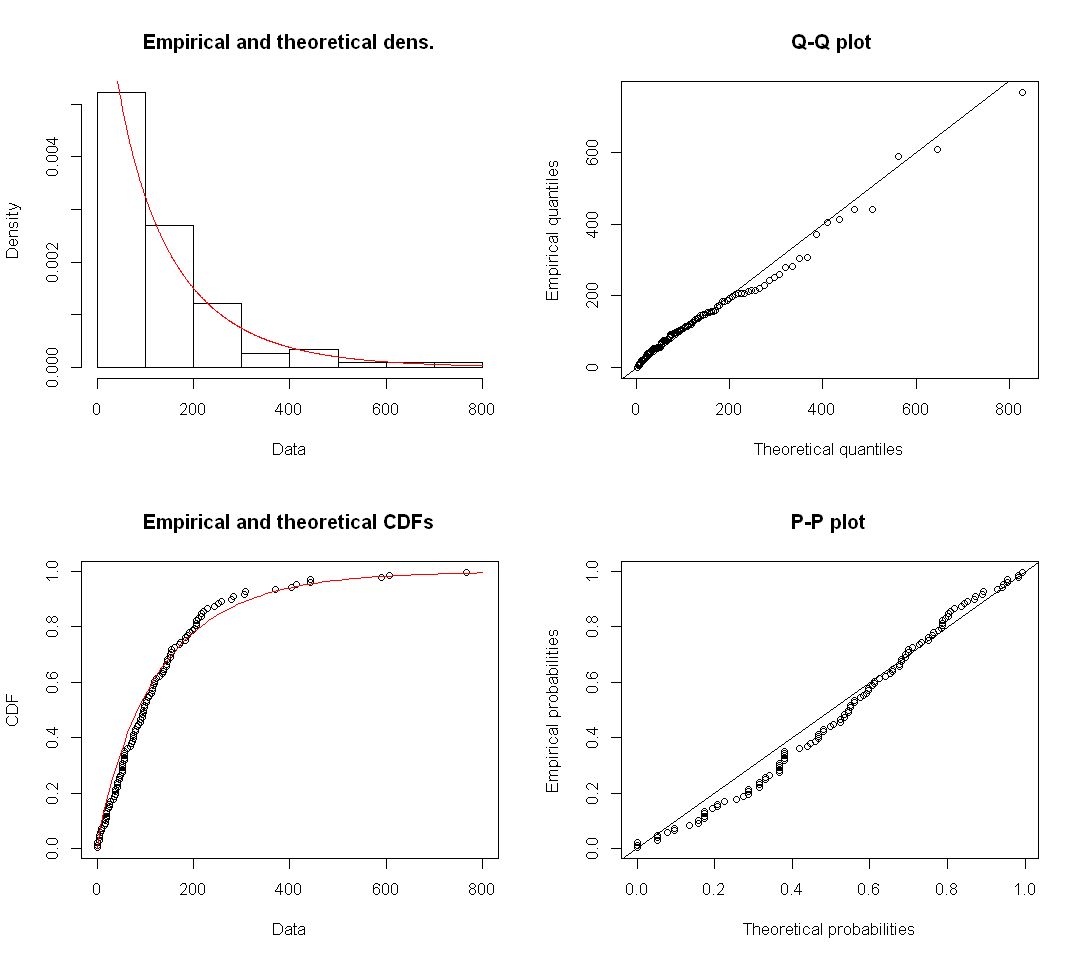

In [32]:
testDist = na.omit(max_PRCP[,1])

    for(j in 1:length(testDist)){
        if(testDist[j] < .1){
        testDist[j]=.0001
        }
    }

plot(fitdist(as.vector(testDist),"weibull",method = "mle"))

In [33]:
mleGamma[1,"KStest"];mleExp[1,"KStest"];mleWB[1,"KStest"]

[1] "not rejected"

[1] "not rejected"

[1] "not rejected"

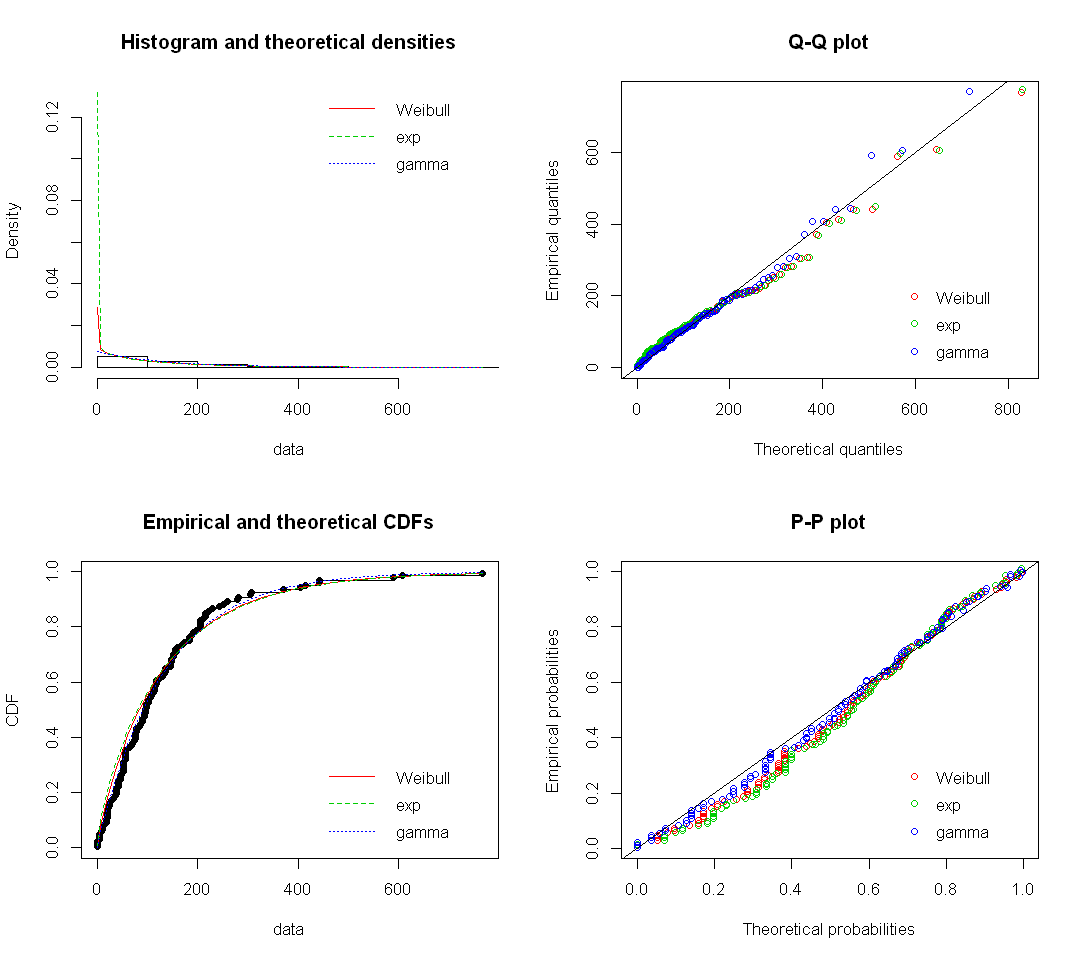

In [34]:
testDist = na.omit(max_PRCP[,1])

    for(j in 1:length(testDist)){
        if(testDist[j] < .1){
        testDist[j]=.0001
        }
    }

fw = fitdist(as.vector(testDist), "weibull", method="mle")
fg = fitdist(as.vector(testDist), "exp", method="mle")
fln = fitdist(as.vector(testDist), "gamma", method="mle")
par(mfrow = c(2, 2))
plot.legend <- c("Weibull", "exp", "gamma")
denscomp(list(fw, fln, fg), legendtext = plot.legend)
qqcomp(list(fw, fln, fg), legendtext = plot.legend)
cdfcomp(list(fw, fln, fg), legendtext = plot.legend)
ppcomp(list(fw, fln, fg), legendtext = plot.legend)

In [35]:
mleGamma[2,"KStest"];mleExp[2,"KStest"];mleWB[2,"KStest"]

[1] "not rejected"

[1] "not rejected"

[1] "not rejected"

In [36]:
mleGamma[3,"KStest"];mleExp[3,"KStest"];mleWB[3,"KStest"]

[1] "not rejected"

[1] "not rejected"

[1] "not rejected"

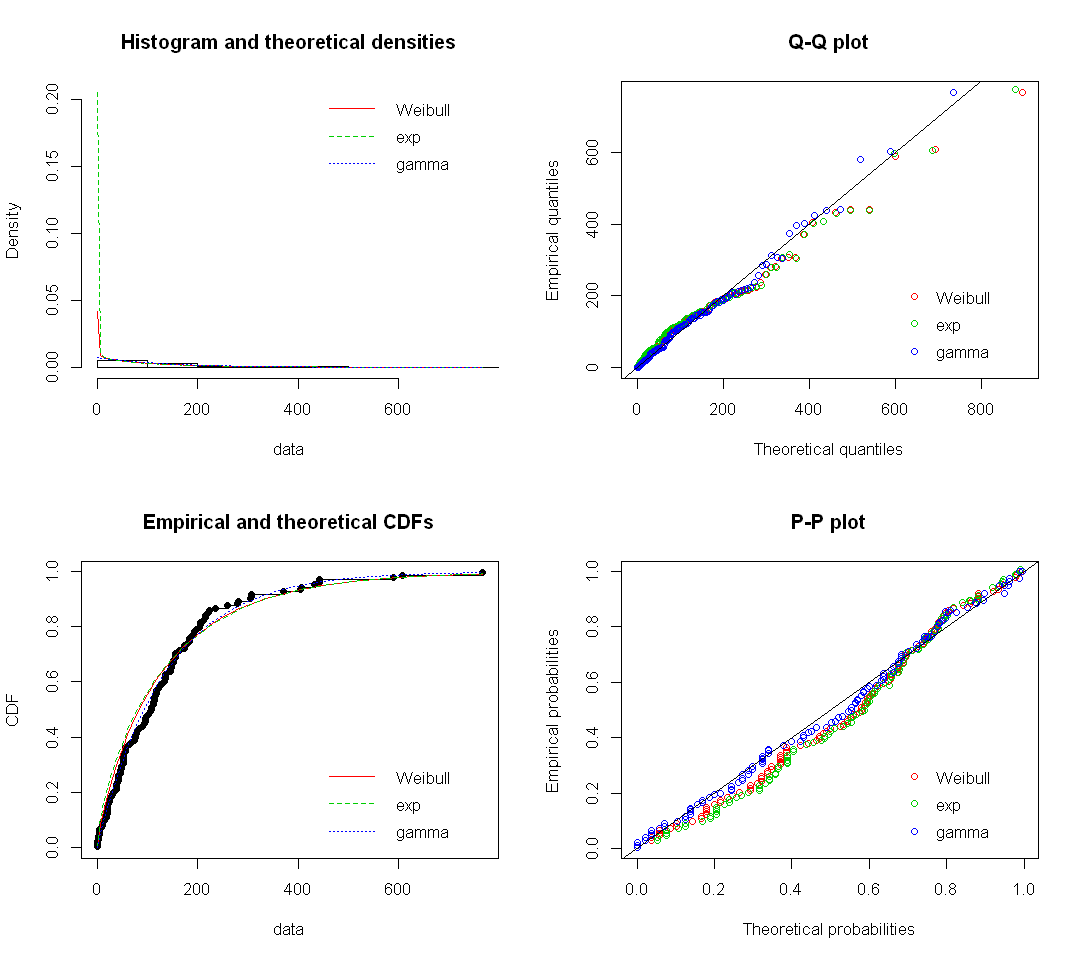

In [37]:
testDist = na.omit(max_PRCP[,3])

    for(j in 1:length(testDist)){
        if(testDist[j] < .1){
        testDist[j]=.0001
        }
    }

fw = fitdist(as.vector(testDist), "weibull", method="mle")
fg = fitdist(as.vector(testDist), "exp", method="mle")
fln = fitdist(as.vector(testDist), "gamma", method="mle")
par(mfrow = c(2, 2))
plot.legend <- c("Weibull", "exp", "gamma")
denscomp(list(fw, fln, fg), legendtext = plot.legend)
qqcomp(list(fw, fln, fg), legendtext = plot.legend)
cdfcomp(list(fw, fln, fg), legendtext = plot.legend)
ppcomp(list(fw, fln, fg), legendtext = plot.legend)

In [38]:
mleGamma[45,"KStest"];mleExp[45,"KStest"];mleWB[45,"KStest"]

[1] "not rejected"

[1] "not rejected"

[1] "not rejected"

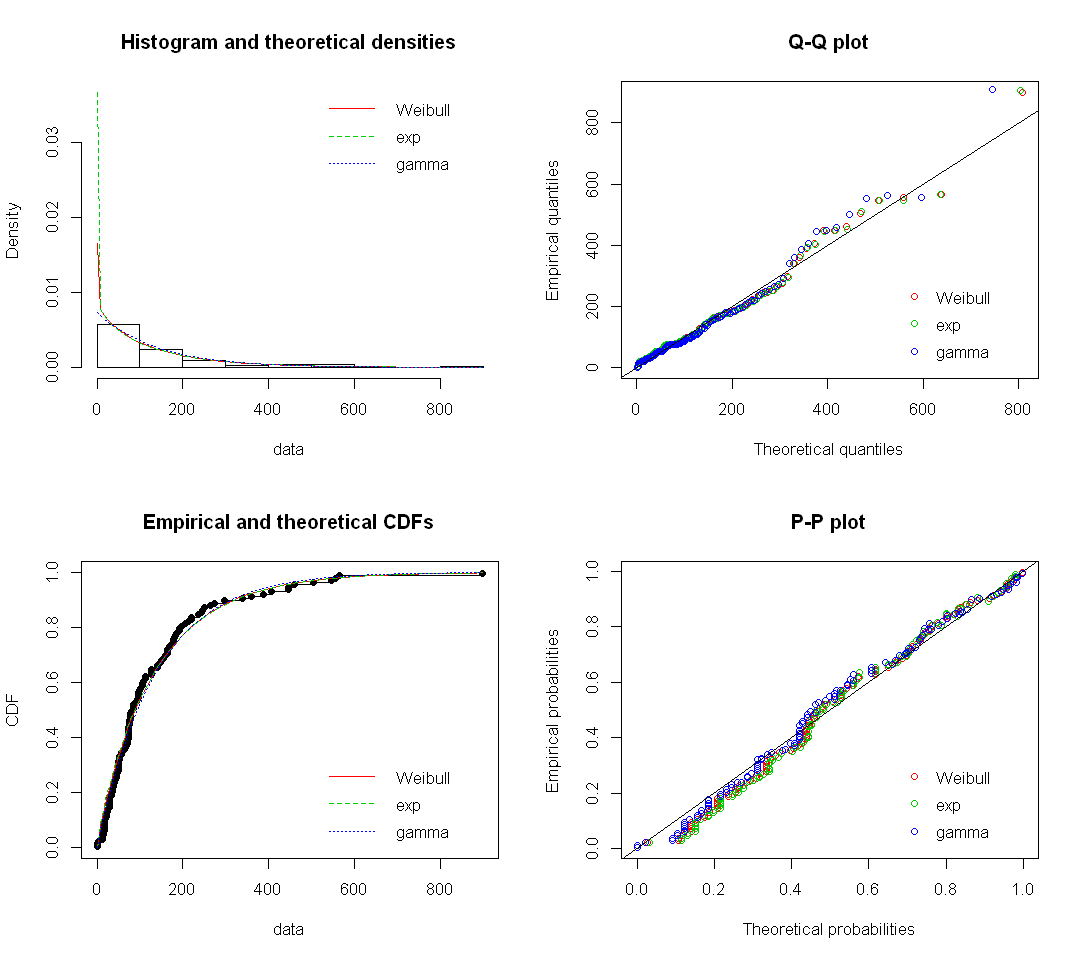

In [39]:
testDist = na.omit(max_PRCP[,45])

    for(j in 1:length(testDist)){
        if(testDist[j] < .1){
        testDist[j]=.0001
        }
    }

fw = fitdist(as.vector(testDist), "weibull", method="mle")
fg = fitdist(as.vector(testDist), "exp", method="mle")
fln = fitdist(as.vector(testDist), "gamma", method="mle")
par(mfrow = c(2, 2))
plot.legend <- c("Weibull", "exp", "gamma")
denscomp(list(fw, fln, fg), legendtext = plot.legend)
qqcomp(list(fw, fln, fg), legendtext = plot.legend)
cdfcomp(list(fw, fln, fg), legendtext = plot.legend)
ppcomp(list(fw, fln, fg), legendtext = plot.legend)

Tried failed fits with normal distribution

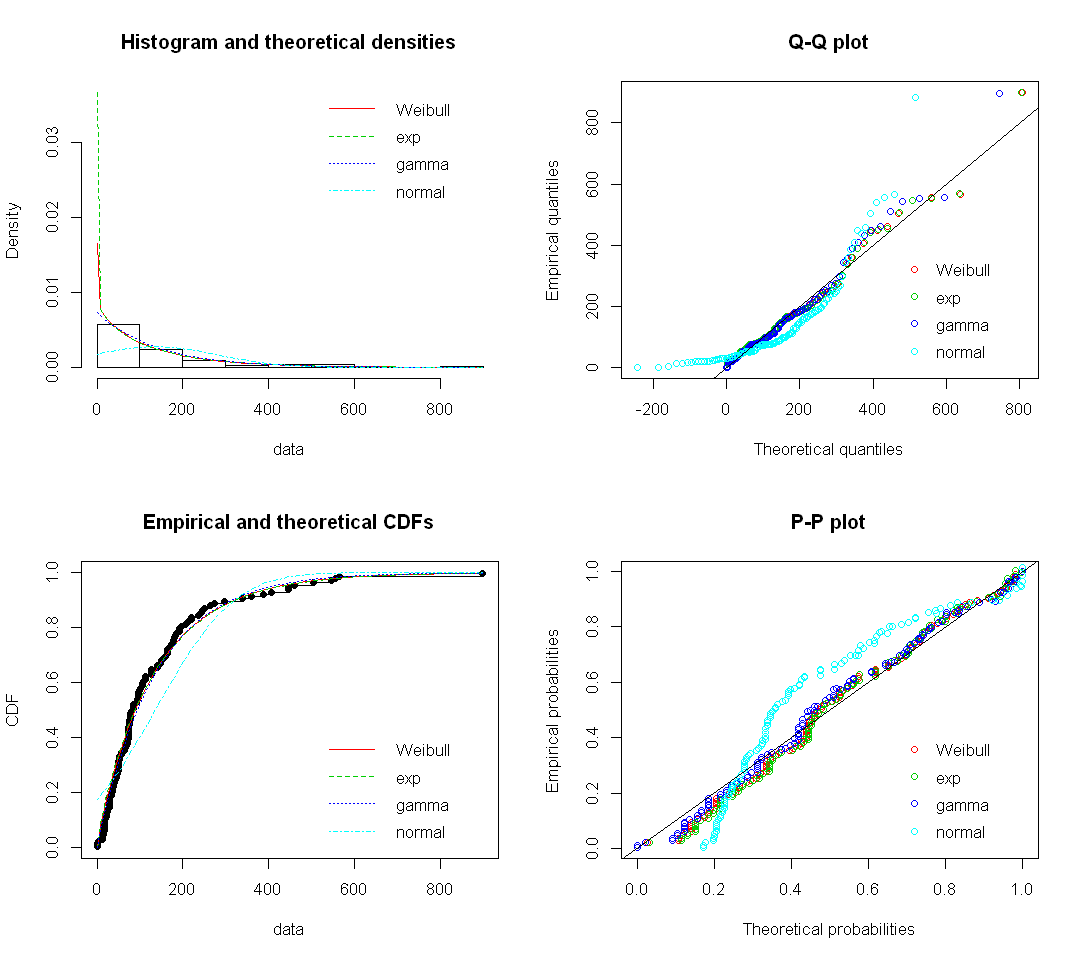

In [40]:
testDist = na.omit(max_PRCP[,45])

    for(j in 1:length(testDist)){
        if(testDist[j] < .1){
        testDist[j]=.0001
        }
    }

fw = fitdist(as.vector(testDist), "weibull", method="mle")
fg = fitdist(as.vector(testDist), "exp", method="mle")
fln = fitdist(as.vector(testDist), "gamma", method="mle")
norm = fitdist(as.vector(testDist), "norm", method="mle")

par(mfrow = c(2, 2))
plot.legend <- c("Weibull", "exp", "gamma","normal")
denscomp(list(fw, fln, fg,norm), legendtext = plot.legend)
qqcomp(list(fw, fln, fg,norm), legendtext = plot.legend)
cdfcomp(list(fw, fln, fg,norm), legendtext = plot.legend)
ppcomp(list(fw, fln, fg,norm), legendtext = plot.legend)

Try good fits with normal distribution

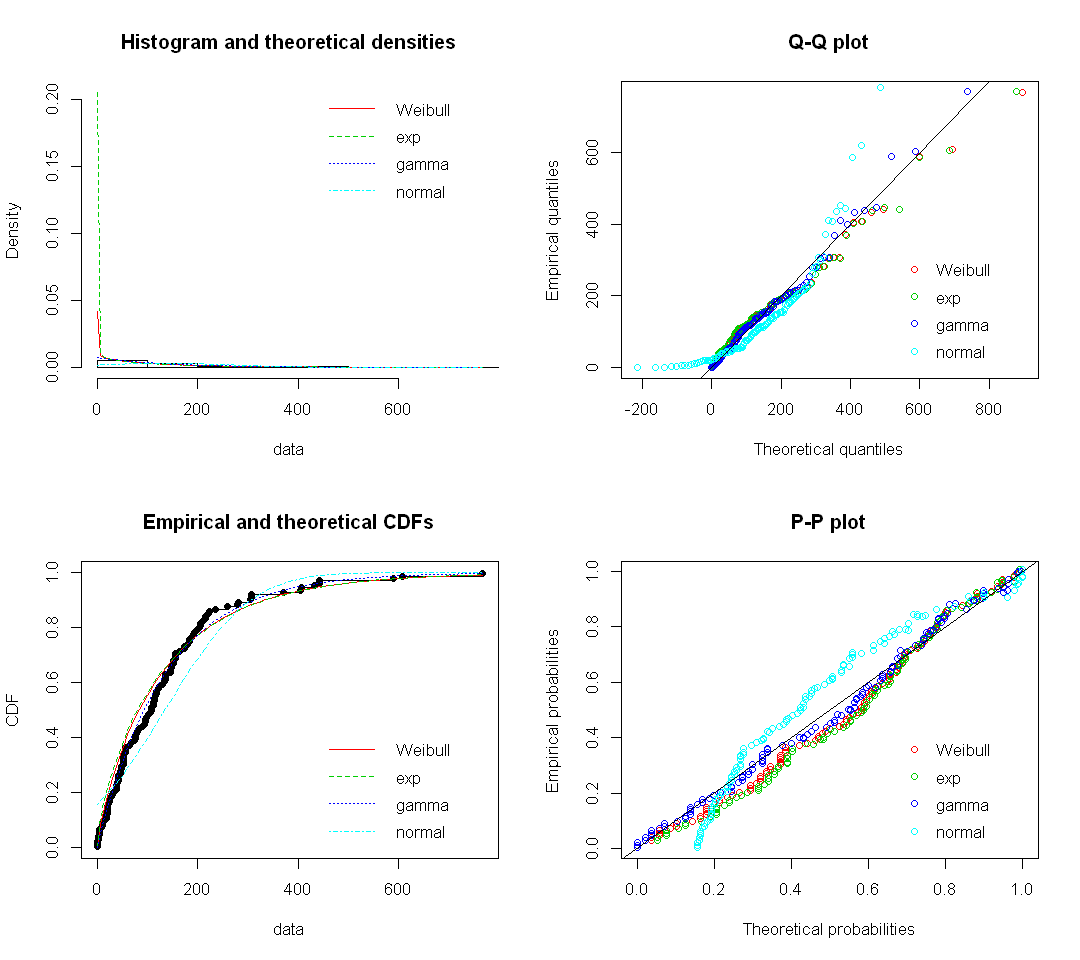

In [41]:
testDist = na.omit(max_PRCP[,3])

    for(j in 1:length(testDist)){
        if(testDist[j] < .1){
        testDist[j]=.0001
        }
    }

fw = fitdist(as.vector(testDist), "weibull", method="mle")
fg = fitdist(as.vector(testDist), "exp", method="mle")
fln = fitdist(as.vector(testDist), "gamma", method="mle")
norm = fitdist(as.vector(testDist), "norm", method="mle")

par(mfrow = c(2, 2))
plot.legend <- c("Weibull", "exp", "gamma","normal")
denscomp(list(fw, fln, fg,norm), legendtext = plot.legend)
qqcomp(list(fw, fln, fg,norm), legendtext = plot.legend)
cdfcomp(list(fw, fln, fg,norm), legendtext = plot.legend)
ppcomp(list(fw, fln, fg,norm), legendtext = plot.legend)

In [42]:
which(trueEst=="fail")

integer(0)

In [43]:
which(trueEst=="plot")

[1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
[20]  20  21  22  23  24  25  26  27  28  29  40  41  42  43  44  45  46  47  48
[39]  49  50  51  58  59  60  63  64  65  66  67  68  69  70  71  72  73  74  75
[58]  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
[77]  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110

In [44]:
mleWB2 = data.frame(alpha = double(),theta = double(),
                 KS = double(),
                 KStest = character(),
                 CvM = double(),
                 CvMtest = character(),
                 AD = double(),
                 ADtest = character(),
                 stringsAsFactors = FALSE)
                
for (i in 1:length(max_PRCP)) {
    
    testDist = na.omit(max_PRCP[,i])
        
        for(j in 1:length(testDist)){
            if(testDist[j] < .1){
            testDist[j]=.0001
            }
        }
    
   WB1 = fitdist(as.vector(testDist),"weibull",method = "mge", gof="ADR")
   mleWB2[i,1] = WB1$estimate[1]
   mleWB2[i,2] = WB1$estimate[2]
   
   gof = gofstat(WB1)
   mleWB2[i,3] = gof$ks
   mleWB2[i,4] = gof$kstest
   mleWB2[i,5] = gof$cvm
   mleWB2[i,6] = gof$cvmtest
   mleWB2[i,7] = gof$ad
   mleWB2[i,8] = gof$adtest
}


#mleWB["mean"] = 1/mleWB$theta
#mleWB["square"] = mleWB$theta^2 
#mleWB["var"] = 1/mleWB$square
#mleWB["sd"] = sqrt(mleWB$var)

In [45]:
table(mleWB2[,4])
table(mleWB[,4])


not rejected 
         110 


not rejected     rejected 
          98           12 

In [46]:
mleGamma2 = data.frame(alpha = double(),
                 theta = double(),
                 KS = double(),
                 KStest = character(),
                 CvM = double(),
                 CvMtest = character(),
                 AD = double(),
                 ADtest = character(),
                 stringsAsFactors = FALSE)
                
for (i in 1:length(max_PRCP)) {

    testDist = na.omit(max_PRCP[,i])
        
        for(j in 1:length(testDist)){
            if(testDist[j] < .1){
            testDist[j]=.0001
            }
        }

   gamma1 = fitdist(as.vector(testDist),"gamma",method = "mge", gof="ADR")
   mleGamma2[i,1] = gamma1$estimate[1]
   mleGamma2[i,2] = gamma1$estimate[2]
   
   gof = gofstat(gamma1)
   mleGamma2[i,3] = gof$ks
   mleGamma2[i,4] = gof$kstest
   mleGamma2[i,5] = gof$cvm
   mleGamma2[i,6] = gof$cvmtest
   mleGamma2[i,7] = gof$ad
   mleGamma2[i,8] = gof$adtest
}

mleGamma["invTheta"] = 1/(mleGamma$theta)
mleGamma["mean"] = mleGamma$invTheta*mleGamma$alpha
mleGamma["var"] = mleGamma$alpha*(mleGamma$invTheta^2)
mleGamma["sd"] = sqrt(mleGamma$var)

In [47]:
table(mleGamma2[,4])


not rejected 
         110 

In [48]:
table(mleGamma[,4])


not rejected     rejected 
          92           18 

In [49]:
mleExp2 = data.frame(theta = double(),
                 KS = double(),
                 KStest = character(),
                 CvM = double(),
                 CvMtest = character(),
                 AD = double(),
                 ADtest = character(),
                 stringsAsFactors = FALSE)
                
for (i in 1:length(max_PRCP)) {

    testDist = na.omit(max_PRCP[,i])
        
        for(j in 1:length(testDist)){
            if(testDist[j] < .1){
            testDist[j]=.0001
            }
        }

   exp1 = fitdist(as.vector(testDist),"exp",method = "mge",gof="ADR")
   mleExp2[i,1] = exp1$estimate[1]
   
   gof = gofstat(exp1)
   mleExp2[i,2] = gof$ks
   mleExp2[i,3] = gof$kstest
   mleExp2[i,4] = gof$cvm
   mleExp2[i,5] = gof$cvmtest
   mleExp2[i,6] = gof$ad
   mleExp2[i,7] = gof$adtest
}

mleExp2["mean"] = 1/mleExp2$theta
mleExp2["square"] = mleExp2$theta^2 
mleExp2["var"] = 1/mleExp2$square
mleExp2["sd"] = sqrt(mleExp2$var)

In [50]:
table(mleExp2[,3])
table(mleExp[,3])


not rejected 
         110 


not rejected 
         110 

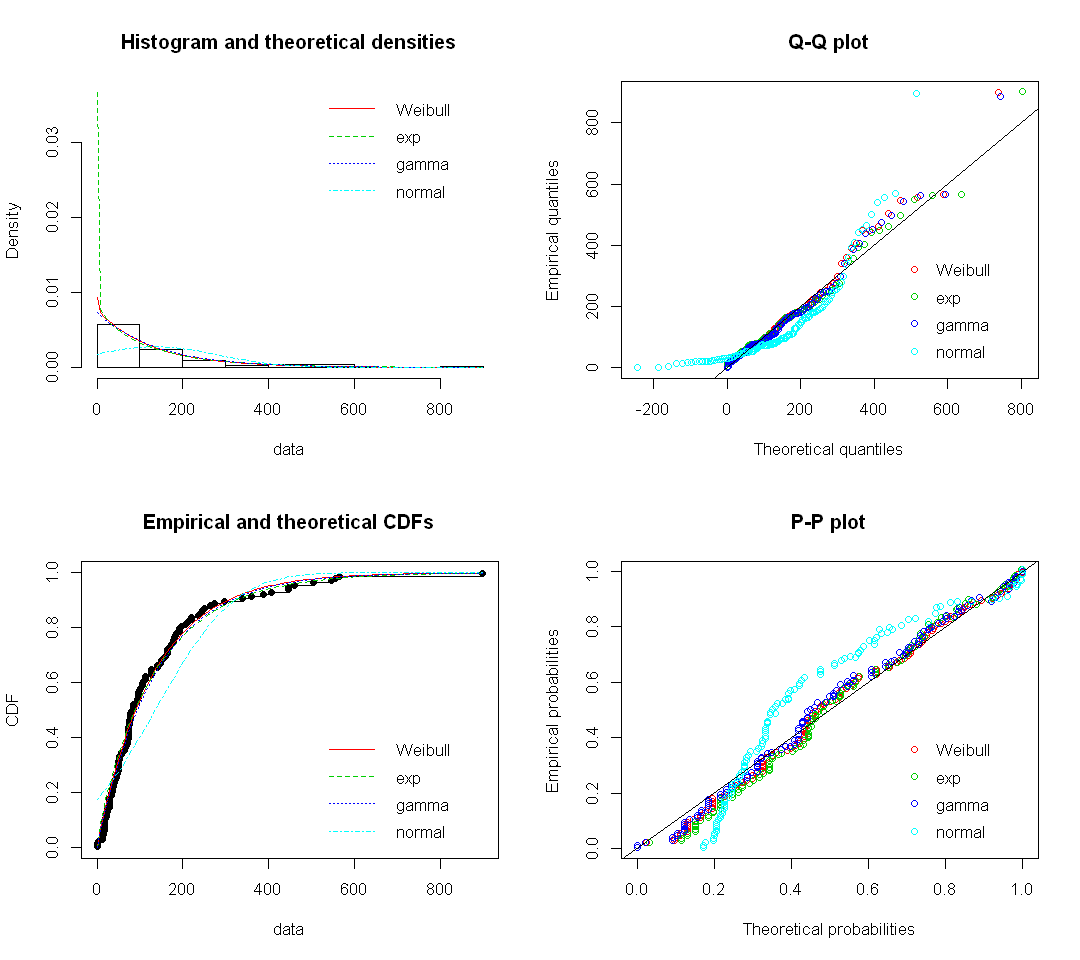

In [51]:
testDist = na.omit(max_PRCP[,45])

    for(j in 1:length(testDist)){
        if(testDist[j] < .1){
        testDist[j]=.0001
        }
    }

fw = fitdist(as.vector(testDist), "weibull", method="mge",gof="ADR")
fg = fitdist(as.vector(testDist), "exp", method="mle")
fln = fitdist(as.vector(testDist), "gamma", method="mle")
norm = fitdist(as.vector(testDist), "norm", method="mle")

par(mfrow = c(2, 2))
plot.legend <- c("Weibull", "exp", "gamma","normal")
denscomp(list(fw, fln, fg,norm), legendtext = plot.legend)
qqcomp(list(fw, fln, fg,norm), legendtext = plot.legend)
cdfcomp(list(fw, fln, fg,norm), legendtext = plot.legend)
ppcomp(list(fw, fln, fg,norm), legendtext = plot.legend)

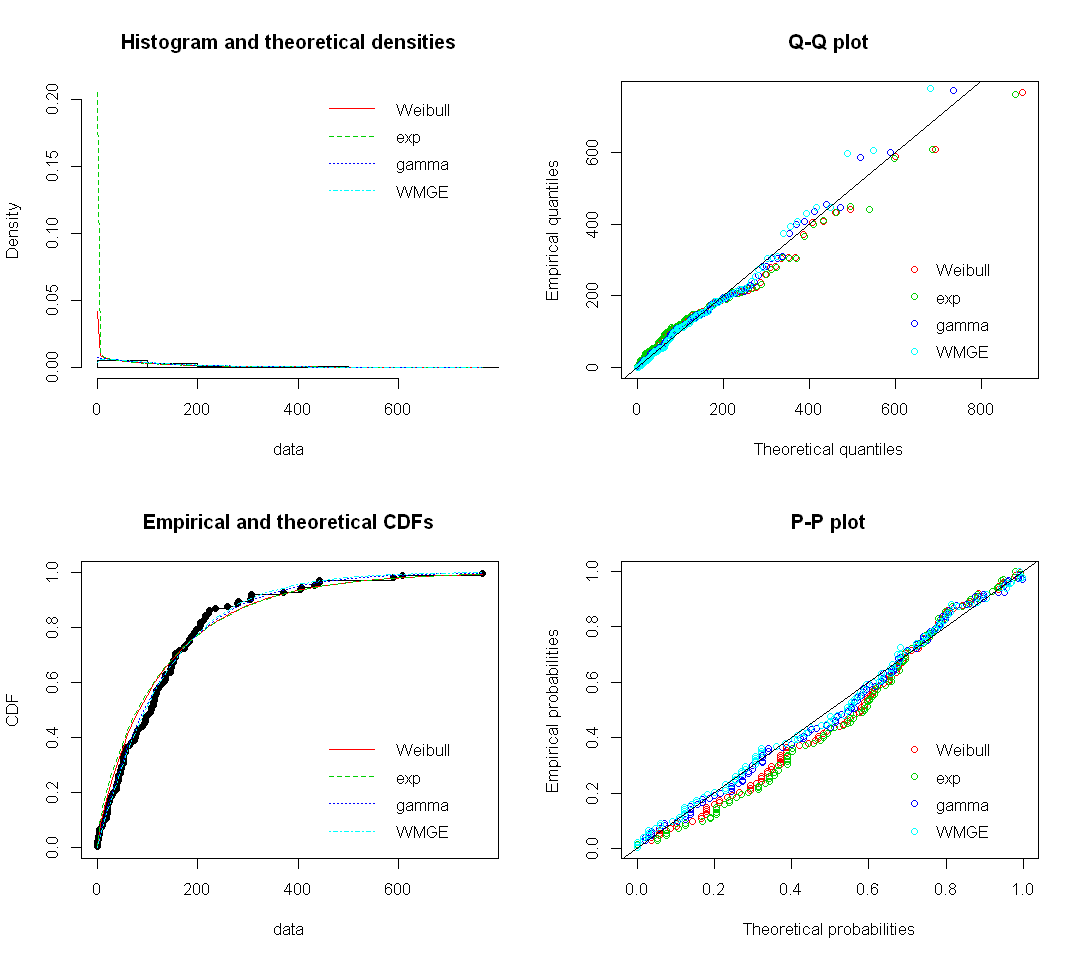

In [52]:
testDist = na.omit(max_PRCP[,3])

    for(j in 1:length(testDist)){
        if(testDist[j] < .1){
        testDist[j]=.0001
        }
    }

fw = fitdist(as.vector(testDist), "weibull", method="mle")
fg = fitdist(as.vector(testDist), "exp", method="mle")
fln = fitdist(as.vector(testDist), "gamma", method="mle")
norm = fitdist(as.vector(testDist), "weibull", method="mge",gof="ADR")

par(mfrow = c(2, 2))
plot.legend <- c("Weibull", "exp", "gamma","WMGE")
denscomp(list(fw, fln, fg,norm), legendtext = plot.legend)
qqcomp(list(fw, fln, fg,norm), legendtext = plot.legend)
cdfcomp(list(fw, fln, fg,norm), legendtext = plot.legend)
ppcomp(list(fw, fln, fg,norm), legendtext = plot.legend)

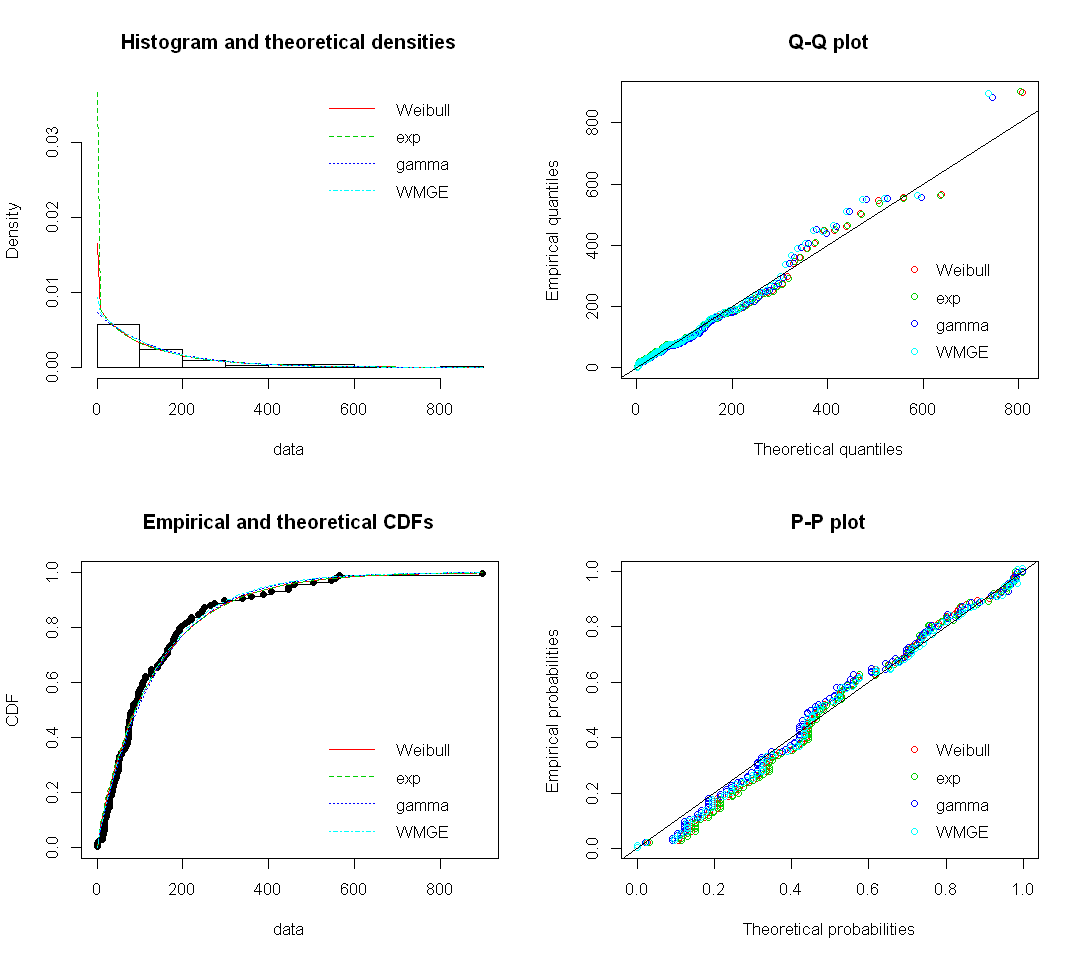

In [53]:
testDist = na.omit(max_PRCP[,45])

    for(j in 1:length(testDist)){
        if(testDist[j] < .1){
        testDist[j]=.0001
        }
    }

fw = fitdist(as.vector(testDist), "weibull", method="mle")
fg = fitdist(as.vector(testDist), "exp", method="mle")
fln = fitdist(as.vector(testDist), "gamma", method="mle")
norm = fitdist(as.vector(testDist), "weibull", method="mge",gof="ADR")

par(mfrow = c(2, 2))
plot.legend <- c("Weibull", "exp", "gamma","WMGE")
denscomp(list(fw, fln, fg,norm), legendtext = plot.legend)
qqcomp(list(fw, fln, fg,norm), legendtext = plot.legend)
cdfcomp(list(fw, fln, fg,norm), legendtext = plot.legend)
ppcomp(list(fw, fln, fg,norm), legendtext = plot.legend)

YET AGAIN, but this time with gamma MGE as well.

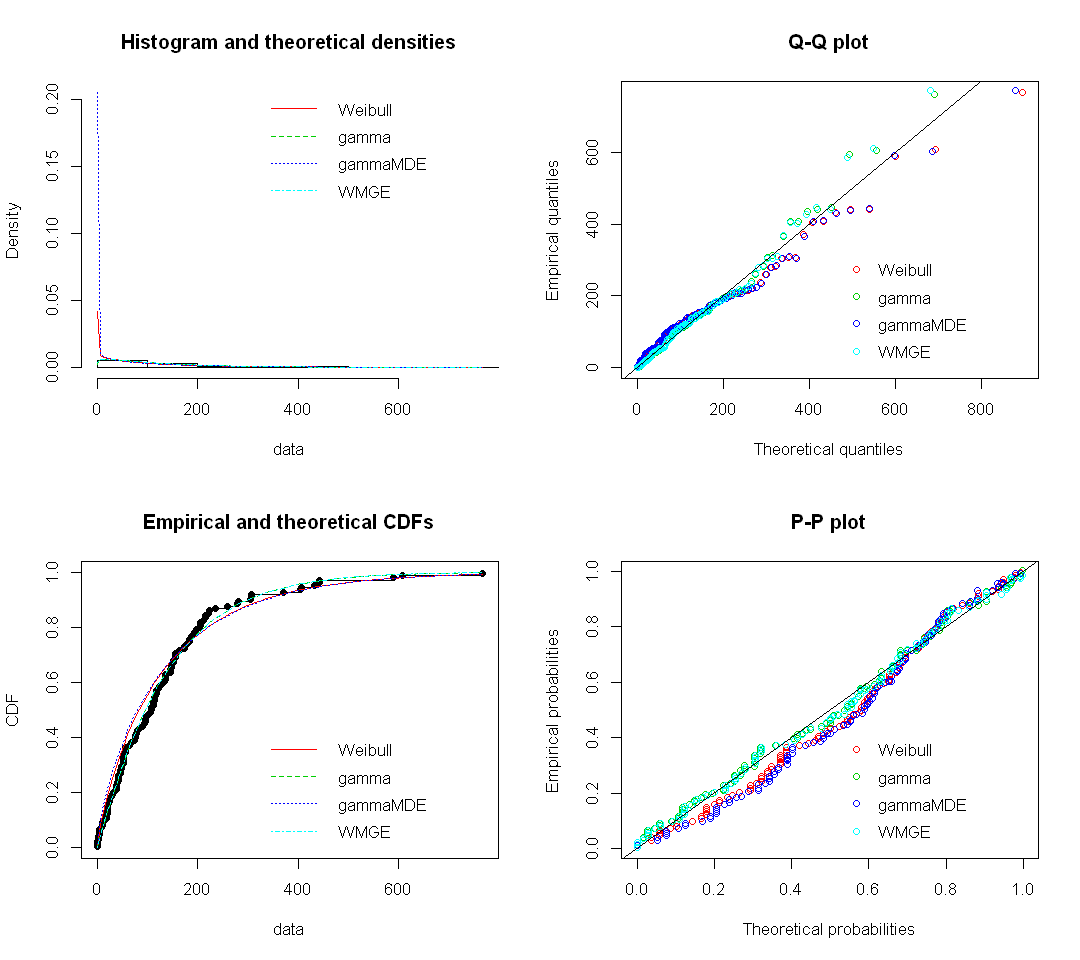

In [54]:
testDist = na.omit(max_PRCP[,3])

    for(j in 1:length(testDist)){
        if(testDist[j] < .1){
        testDist[j]=.0001
        }
    }

fw = fitdist(as.vector(testDist), "weibull", method="mle")
fg = fitdist(as.vector(testDist), "gamma", method="mle")
fln = fitdist(as.vector(testDist), "gamma", method="mge", gof="ADR")
norm = fitdist(as.vector(testDist), "weibull", method="mge",gof="ADR")

par(mfrow = c(2, 2))
plot.legend <- c("Weibull", "gamma", "gammaMDE","WMGE")
denscomp(list(fw, fln, fg,norm), legendtext = plot.legend)
qqcomp(list(fw, fln, fg,norm), legendtext = plot.legend)
cdfcomp(list(fw, fln, fg,norm), legendtext = plot.legend)
ppcomp(list(fw, fln, fg,norm), legendtext = plot.legend)

# Probabilities of Interest 

1 inch of rain approx 25.4mm, 2 inch approx 50.8, 3 inch approx 76.2mm.

Parameter estimates for frequentist probability checks are found in mleGamma2 (using maximum goodness of fit with ADR distance for right tailed data).

probability of seeing or exceeding 1 inch of rain in a 24 hour day

In [55]:
1-pgamma(254, mleGamma2[1,1], mleGamma[1,2])

[1] 0.2832963

In [56]:
1-pgamma(508, mleGamma2[1,1], mleGamma[1,2])

[1] 0.06999973

In [57]:
1-pgamma(762, mleGamma2[1,1], mleGamma[1,2])

[1] 0.01679679

In [58]:
oneInch = NULL
twoInch = NULL
threeInch = NULL
for(i in 1:nrow(mleGamma2)){
    oneInch = c(oneInch,1-pgamma(254,mleGamma2[i,1],mleGamma2[i,2]))
    twoInch = c(twoInch,1-pgamma(508,mleGamma2[i,1],mleGamma2[i,2]))
    threeInch = c(threeInch,1-pgamma(762,mleGamma2[i,1],mleGamma2[i,2]))
}

In [59]:
length(oneInch)

[1] 110

In [60]:
starter = firstYear+9

In [61]:
oneInchTS = ts(oneInch, start=starter)
twoInchTS = ts(twoInch, start=starter)
threeInchTS = ts(threeInch, start=starter)

In [62]:
options(repr.plot.width=7,repr.plot.height=5) #reduces the plot sizes

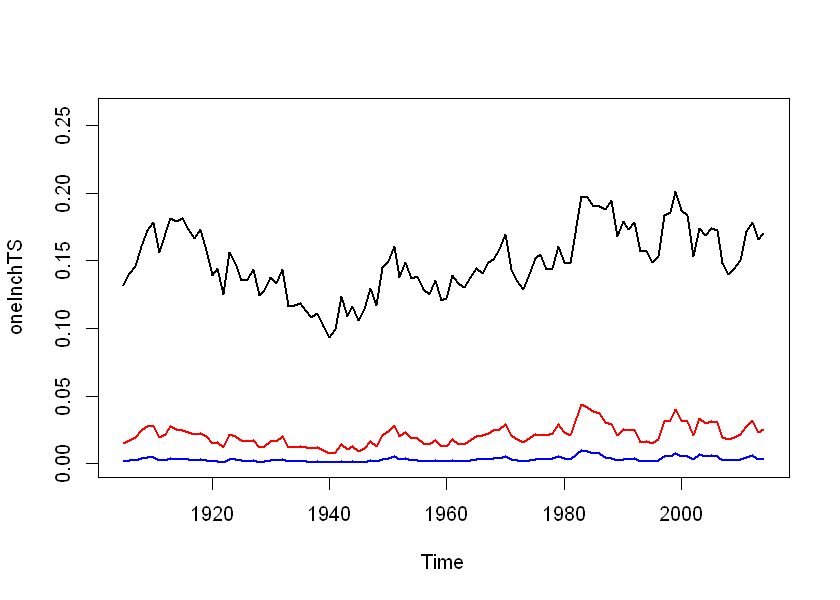

In [63]:
plot(oneInchTS, ylim=c(0,.26), lwd=2)
lines(twoInchTS, col=2, lwd=2)
lines(threeInchTS, col=4, lwd=2)

In [64]:
rollSmall = ts(runmean(oneInchTS,15),start=starter)
rollSmall2 = ts(runmean(oneInchTS,30),start=starter)
rollSmall3 = ts(runmean(oneInchTS,50),start=starter)

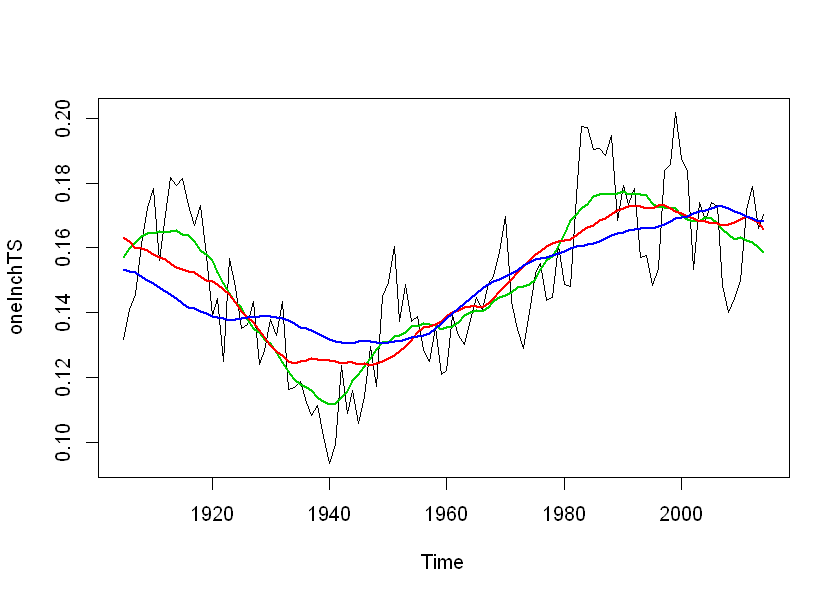

In [65]:
plot(oneInchTS)
lines(rollSmall, col=3,lwd=2)
lines(rollSmall2, col=2,lwd=2)
lines(rollSmall3, col=4,lwd=2)

In [66]:
rollSmall = ts(runmean(twoInchTS,15),start=starter)
rollSmall2 = ts(runmean(twoInchTS,30),start=starter)
rollSmall3 = ts(runmean(twoInchTS,50),start=starter)

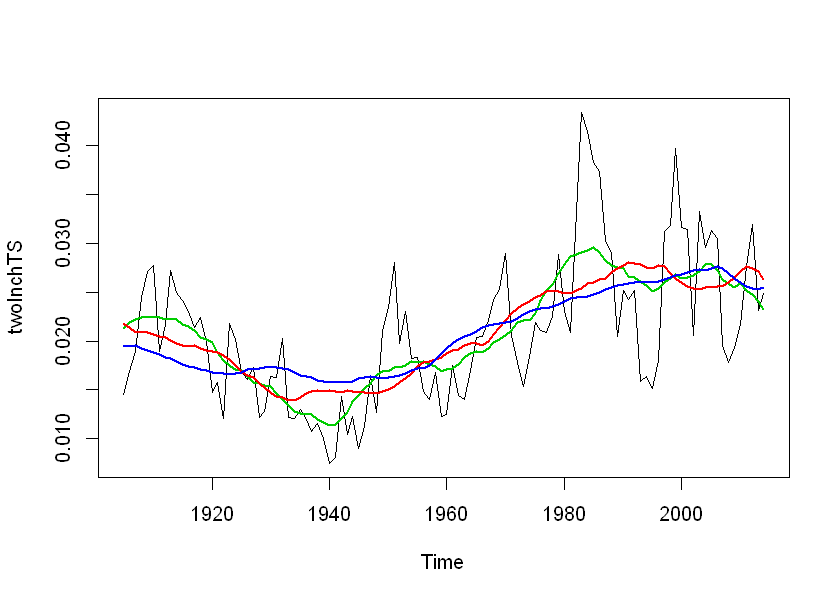

In [67]:
plot(twoInchTS)
lines(rollSmall, col=3,lwd=2)
lines(rollSmall2, col=2,lwd=2)
lines(rollSmall3, col=4,lwd=2)

In [68]:
rollSmall = ts(runmean(threeInchTS,15),start=starter)
rollSmall2 = ts(runmean(threeInchTS,30),start=starter)
rollSmall3 = ts(runmean(threeInchTS,50),start=starter)

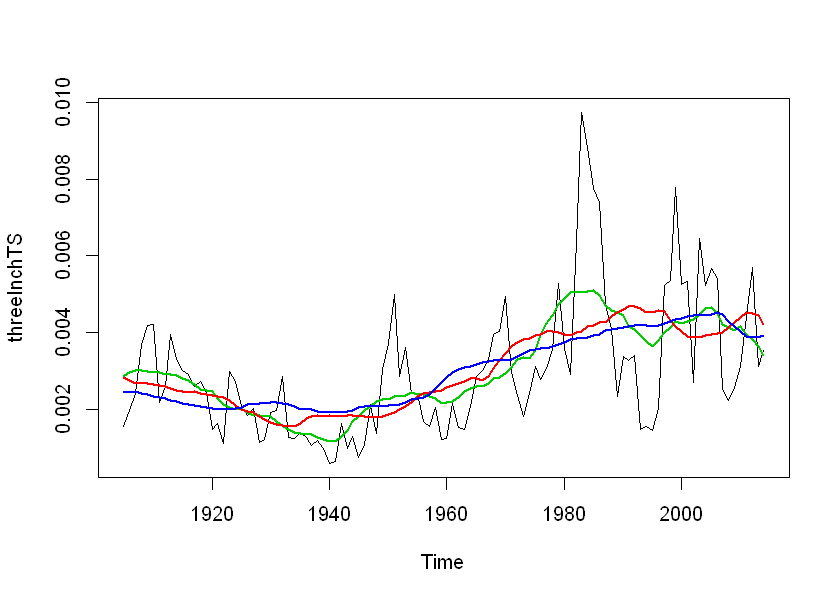

In [69]:
plot(threeInchTS)
lines(rollSmall, col=3,lwd=2)
lines(rollSmall2, col=2,lwd=2)
lines(rollSmall3, col=4,lwd=2)